In [1]:
"""
Used for ploting csv data
"""

'\nUsed for ploting csv data\n'

In [2]:
# imports
import time
import datetime
import pandas as pd
from fractions import Fraction as frac

In [3]:
# Read in csv's
list_of_csv = [
    # TODO: figure out problems with 2017 data
    # 'full_data__6__2017.csv', # don't use 2017 data, its not great
    'full_data__6__2018.csv',
    'full_data__6__2019.csv',
    'full_data__6__2020.csv',
    'full_data__6__2021.csv'
]
sorted_list_of_csv = [
    'sorted_full_data_2018.csv',
    'sorted_full_data_2019.csv',
    'sorted_full_data_2020.csv',
    'sorted_full_data_2021.csv'
]
# Start: '1/1/2018'
# End: '10/5/2021'

# Path to full data csv files
def full_path(csv):
    return f'csv_files\\{csv}'
# Path to price_period csv files
def period_path(csv):
    return f'csv_files\\price_periods\\{csv}'

In [4]:
# Test if csv are sorted
for csv in list_of_csv:
    data = pd.read_csv(full_path(csv))
    sorted_data = data.sort_values(by=['timestamp'])
    print(f'{csv} is sorted?: {data.equals(sorted_data)}')
    # The above resulted in 
    # full_data__6__2018.csv is sorted?: True
    # full_data__6__2019.csv is sorted?: False
    # full_data__6__2020.csv is sorted?: False
    # full_data__6__2021.csv is sorted?: False
    # So we have to sort the data (only do this once)
    
    # Test for nulls
    null_counts = sorted_data[['timestamp', 'Open', 'Close', 'High', 'Low']].isnull().sum()
    null_counts[null_counts > 0].sort_values(ascending=False)
    print('Null values found:')
    print(null_counts)
    # No nulls!

    # Create 'price' column from avg of Open and Close
    # First make the row and round to 4 decimals
    sorted_data['decimal_price'] = round(sorted_data['Open'] + sorted_data['Close'] + sorted_data['High'] + sorted_data['Low'],
         4)
    # Then fractionalize the number to minimize floating point rounding errors
    sorted_data['fraction_price'] = sorted_data['decimal_price'].apply(lambda x: frac(x)/4)
    # Average out decimal price
    sorted_data['decimal_price'] = sorted_data['decimal_price']/4
    # Give the index a name for the csv
    sorted_data.index.names = ['index']
    # drop all columns we don't want
    sorted_data = sorted_data.filter(['index', 'timestamp', 'fraction_price', 'decimal_price'])
    # Only run this once
    # sorted_data.to_csv(full_path('sorted_full_data_'+ csv[-8:]))

# Spacing
print('\nSorted check:')
# Show that sorted data is sorted
for csv in sorted_list_of_csv:
    data = pd.read_csv(full_path(csv))
    sorted_data = data.sort_values(by=['timestamp'])
    print(f'{csv} is sorted?: {data.equals(sorted_data)}')



full_data__6__2018.csv is sorted?: True
Null values found:
timestamp    0
Open         0
Close        0
High         0
Low          0
dtype: int64
full_data__6__2019.csv is sorted?: False
Null values found:
timestamp    0
Open         0
Close        0
High         0
Low          0
dtype: int64
full_data__6__2020.csv is sorted?: False
Null values found:
timestamp    0
Open         0
Close        0
High         0
Low          0
dtype: int64
full_data__6__2021.csv is sorted?: False
Null values found:
timestamp    0
Open         0
Close        0
High         0
Low          0
dtype: int64

Sorted check:
sorted_full_data_2018.csv is sorted?: True
sorted_full_data_2019.csv is sorted?: True
sorted_full_data_2020.csv is sorted?: True
sorted_full_data_2021.csv is sorted?: True


In [5]:
# Create arbitrary plot
def create_price_period(start, end, name):
    """
    Loops through csv until time > start and continue until end < time.
    If the end of a file is reached, open the next one.
    Save the resulting data as a new csv called 'name.csv'
    """
    start = int(time.mktime(datetime.datetime.strptime(start, "%m/%d/%Y").timetuple()))
    print(f'Start timestamp: {start}')
    end = int(time.mktime(datetime.datetime.strptime(end, "%m/%d/%Y").timetuple()))
    print(f'End timestamp: {end}')
    new_df = pd.DataFrame(columns=['timestamp'])

    for csv in sorted_list_of_csv:
        # read data in
        data = pd.read_csv(full_path(csv))
        data = data.drop(['index'], axis=1)
        end_time_of_csv = data['timestamp'].iloc[-1]
        # Check if end_of_csv_time < start: go to next csv
        if end_time_of_csv < start:
            continue
        # Add all rows that are between start and end to new_df
        new_df = new_df.append(
            data.loc[
                (data['timestamp'] > start) &
                (data['timestamp'] < end)
            ], ignore_index=True
        )
        # check if end_of_csv_time > end: stop collecting data
        if end_time_of_csv > end:
            break

    # Rename the actual index to 'index'
    new_df.index.names = ['index']

    print(new_df)
    # Save df as csv
    if not new_df.empty:
        new_df.to_csv(period_path(name+'.csv'))

In [6]:
# Start: '1/1/2018'
# End: '10/5/2021'
create_price_period('1/1/2018','1/5/2018', 'test')
# create_price_period('1/1/2018','10/5/2021', 'everything')
create_price_period('1/1/2018','2/1/2018', 'test_month')
# create_price_period('1/1/2018','1/1/2019', '2018_price_data')
# create_price_period('1/1/2019','1/1/2020', '2019_price_data')
# create_price_period('1/1/2020','1/1/2021', '2020_price_data')
# create_price_period('1/1/2021','11/25/2021', '2021_price_data_inc') # 2021 data is not complete

Start timestamp: 1514793600
End timestamp: 1515139200
        timestamp                  fraction_price  decimal_price
index                                                           
0      1514793660  6643518635371397/8796093022208     755.280625
1      1514793720  6638235481999933/8796093022208     754.680000
2      1514793780   829728582837207/1099511627776     754.633750
3      1514793840  1659565742447657/2199023255552     754.683125
4      1514793900  1659237263348859/2199023255552     754.533750
...           ...                             ...            ...
5754   1515138900  8868105536269189/8796093022208    1008.186875
5755   1515138960  8862234144176865/8796093022208    1007.519375
5756   1515139020  4431969193599959/4398046511104    1007.713125
5757   1515139080  8874664123128873/8796093022208    1008.932500
5758   1515139140  8862206656386171/8796093022208    1007.516250

[5759 rows x 3 columns]
Start timestamp: 1514793600
End timestamp: 1517472000
        timestamp     

Start datetime: 2018-01-01 08:01:00
End datetime:   2018-01-05 07:59:00


<AxesSubplot:xlabel='timestamp'>

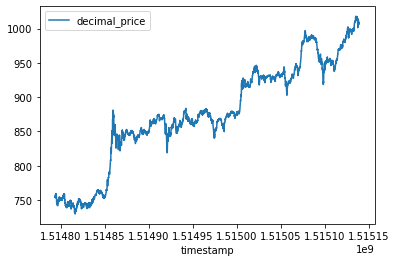

In [7]:
# Recalibrate time variable in a new row to start at 0
# start_time = data['Time'].values[0]
# data['Cal Time'] = data['Time'].apply(lambda x: x - start_time)

# Examples
# Plot data returned
# By default x=index
# data.plot(y='To #', kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', xlim=(35000,45000))
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', ylim=(data['To #'].mean()*(1-.005),data['To #'].mean()*(1+.005)))

# testing
data = pd.read_csv(period_path('test.csv'), index_col='index')
# print(type(data['fraction_price'].values[0]))
# print(dir(data['price'].values[0]))
start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
print(f'Start datetime: {start_datetime}')
print(f'End datetime:   {end_datetime}')
data.plot(x='timestamp', y='decimal_price', kind='line')

sorted_full_data_2018.csv
Start datetime: 2018-01-01 00:01:00
End datetime:   2018-12-31 23:59:00
sorted_full_data_2019.csv
Start datetime: 2019-01-01 00:01:00
End datetime:   2019-12-31 23:59:00
sorted_full_data_2020.csv
Start datetime: 2020-01-01 00:01:00
End datetime:   2020-12-31 23:59:00
sorted_full_data_2021.csv
Start datetime: 2021-01-01 00:01:00
End datetime:   2021-11-26 23:43:00


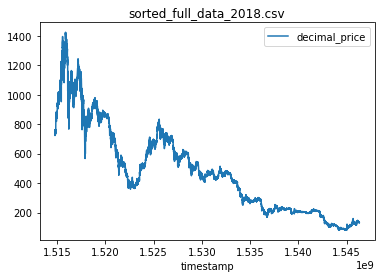

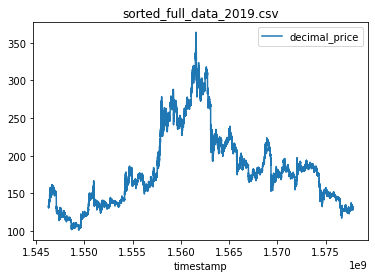

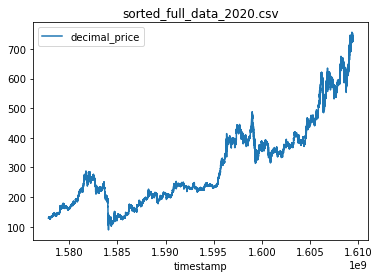

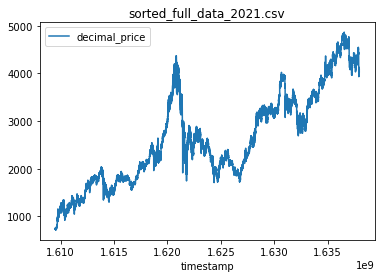

In [8]:
# Plots
for csv in sorted_list_of_csv:
    print(csv)
    data = pd.read_csv(full_path(csv), index_col='index')
    start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
    end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
    print(f'Start datetime: {start_datetime}')
    print(f'End datetime:   {end_datetime}')
    data.plot(x='timestamp', y='decimal_price', title=csv, kind='line')

everything.csv
Start datetime: 2018-01-01 08:01:00
End datetime:   2021-10-05 06:59:00


<AxesSubplot:title={'center':'everything.csv'}, xlabel='timestamp'>

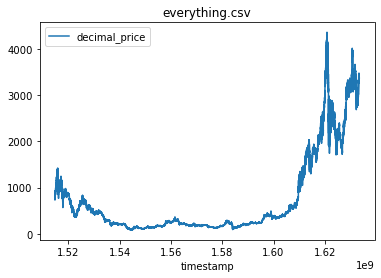

In [9]:
csv = 'everything.csv'
print(csv)
data = pd.read_csv(period_path(csv), index_col='index')
start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
print(f'Start datetime: {start_datetime}')
print(f'End datetime:   {end_datetime}')
data.plot(x='timestamp', y='decimal_price', title=csv, kind='line')